In [112]:
import math as mt
import copy
import numpy as np

class GG:
    def __init__(self, k, b=1, sigma=1, s=20):
        self.k = k
        self.b = b
        self.sigma = sigma
        self.s = s 
    def norm(self, c, x):
        x = np.array(x)
        return ((np.dot(x-c,x-c))**(2*self.b))/(2*self.sigma**2)
    def func_mount(self, x, y, X):
        c = [x,y]
        return sum([mt.exp(-self.norm(c, X[i])) for i in range(len(X))])
    def inicialize(self, X):
        a1, a2 = np.min(X, axis = 0)
        b1, b2 = np.max(X, axis = 0)  
        x = np.linspace(a1-1, b1+1, self.s)
        y = np.linspace(a2-1, b2+1, self.s)
        X1, Y1 = np.meshgrid(x,y)
        Z1 = copy.deepcopy(X1)
        for i in range(self.s):
            for j in range(self.s):
                Z1[i,j] = self.func_mount(X1[i,j], Y1[i,j], X)
        return X1, Y1, Z1
    def find_first_center(self, X):
        X1, Y1, Z1 = self.inicialize(X)
        c1 = [0,0]
        z = 0
        for i in range(self.s):
            for j in range(self.s):
                if Z1[i,j]>z:
                    c1[0] = X1[i,j]
                    c1[1] = Y1[i,j]
                    z = Z1[i,j]
        return X1, Y1, Z1, c1
    def update_func(self, X, X1, Y1, Z1, c):
        for i in range(self.s):
            for j in range(self.s):
                Z1[i,j] -= self.func_mount(c[0],c[1], X)*mt.exp(-self.norm([X1[i,j],Y1[i,j]], c))
        return X1, Y1, Z1    
    
    def find_next_center(self, X1, Y1, Z1):
        c = [0,0]
        z = 0
        for i in range(self.s):
            for j in range(self.s):
                if Z1[i,j]>z:
                    c[0] = X1[i,j]
                    c[1] = Y1[i,j]
                    z = Z1[i,j]
        return X1, Y1, Z1, c
    
    def find_centers(self, X):
        centers = []
        X1, Y1, Z1, c1 = self.find_first_center(X)
        centers.append(c1)
        self.k -= 1
        while self.k >0:
            X1, Y1, Z1 = self.update_func(X, X1, Y1, Z1, centers[-1])
            X1, Y1, Z1, c = self.find_next_center(X1, Y1, Z1)
            centers.append(c)
            self.k -= 1
        return np.array(centers)
    
    def predict_label(self, X):
        centers = self.find_centers(X)
        p = []
        kk = []
        labels = []
        for i in range(len(X)):
            for j in range(len(centers)):
                kk.append(mt.exp(-self.norm(X[i], centers[j])))
            labels.append(kk.index(max(kk)))
            kk = []
        return labels

In [ ]:
  distances_points[i] = np.append(grid_points[i], sum(np.exp(-((grid_points[i][0] - blob_points[:, 0])**2 + (grid_points[i][1] - blob_points[:, 1])**2))))


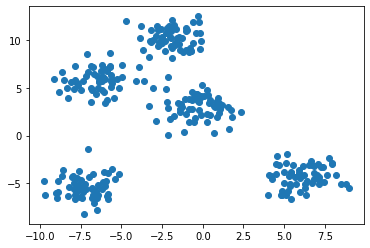

In [113]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, random_state=104, n_features=2, centers = 5, cluster_std = 1.2)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

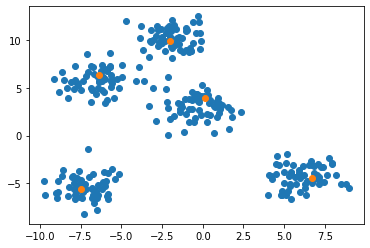

In [114]:
t= GG(k=5)
centers = t.find_centers(X)


plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centers[:, 0], centers[:, 1])

plt.show()


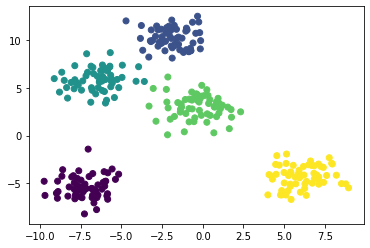

In [115]:
t= GG(k=5)

plt.scatter(X[:, 0], X[:, 1], c = t.predict_label(X))
plt.show()

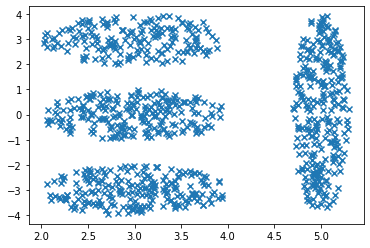

In [116]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000
x = np.random.uniform(-6, 6, n)
y = np.random.uniform(-6, 6, n)

x1 = []
y1 = []
for i in range(n):
    if ((x[i]-5)**2)/0.3**2+((y[i]-0)**2)/4**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-3)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-0)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]+3)**2)/1**2 <=1:
        x1.append(x[i])
        y1.append(y[i])
X = np.array([[x,y] for (x,y) in zip(x1,y1)])

plt.scatter(X[:,0],X[:,1], marker = "x")
plt.show()

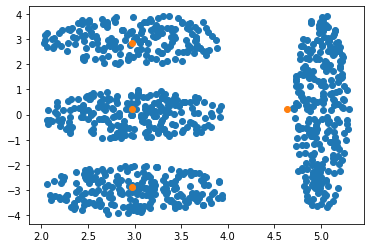

In [119]:
t= GG(k=4)
centers = t.find_centers(X)


plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centers[:, 0], centers[:, 1])

plt.show()

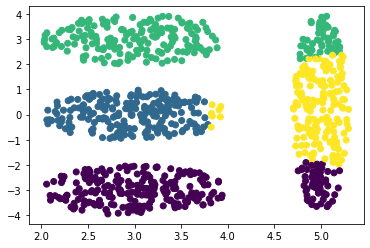

In [117]:
t= GG(k=4)

plt.scatter(X[:, 0], X[:, 1], c = t.predict_label(X))
plt.show()

In [123]:
class GK:
    def __init__(self, k, m = 2, iterations = 5):
        self.k = k
        self.m = m
        self.iterations = iterations
    def distance(self, x, c, A):
        return (np.dot(x-c,np.dot(A,x-c)))**0.5
    def iniciate(self, X):
        t = GG(self.k)
        centers = t.find_centers(X)
        A = np.array([np.identity(len(X[0])) for i in range(self.k)])
        S = np.array([np.identity(len(X[0])) for i in range(self.k)])
        U = np.zeros((len(X), self.k))
        return centers, A, S, U
    def predict_label(self, X):
        centers, A, S, U = self.iniciate(X)
        for epoch in range(self.iterations):
            #aktualizuje u (przynaleznosci)
            for i in range(len(X)):
                for j in range(self.k):
                    U[i][j] = 1/sum([(d(X[i],centers[j],A[j])/d(X[i],centers[k],A[j]))**(2/(self.m-1)) for k in range(4)])        
            #aktualizuje c (centra)
            for j in range(self.k):
                centers[j] = sum([(U[k][j]**self.m)*X[k] for k in range(len(X))])/sum([(U[k][j]**self.m) for k in range(len(X))])       
            #aktualizuje S (macierze kowariancji)
            for j in range(4):
                S[j] = sum([(U[k][j]**self.m)*np.outer(X[k]-centers[j],X[k]-centers[j]) for k in range(len(X))])/sum([(U[k][j]**self.m) for k in range(len(X))])   
            #aktualizuje A (macierze skalujące)
            for j in range(4):
                A[j] = (np.linalg.det(S[j])**(1/2))*np.linalg.inv(S[j])  
        return np.argmax(U, axis=1)

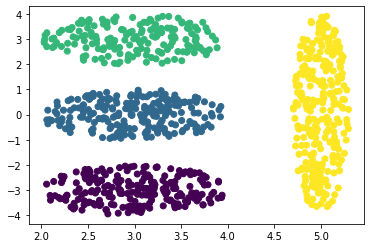

In [124]:
t= GK(k=4)

plt.scatter(X[:, 0], X[:, 1], c = t.predict_label(X))
plt.show()

Inne miary oceny wyboru liczby klastrów

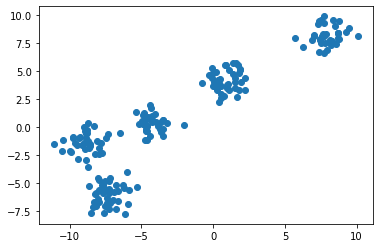

In [131]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=200, random_state=3, n_features=2, centers = 5, cluster_std = 0.8)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [128]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    print(f"Liczba klastrów: {n_clusters}, Indeks sylwetki: {silhouette_avg}")

Liczba klastrów: 2, Indeks sylwetki: 0.6614453376483235
Liczba klastrów: 3, Indeks sylwetki: 0.6457850782996308
Liczba klastrów: 4, Indeks sylwetki: 0.6315723571431046
Liczba klastrów: 5, Indeks sylwetki: 0.7277149707757988
Liczba klastrów: 6, Indeks sylwetki: 0.6631337515080107
Liczba klastrów: 7, Indeks sylwetki: 0.5821483930953036
Liczba klastrów: 8, Indeks sylwetki: 0.5002768937849261
Liczba klastrów: 9, Indeks sylwetki: 0.4381550085573005


https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html